# About Data 
 The dataset focuses on customer sentiments regarding airlines, capturing valuable insights into their experiences, preferences, and overall satisfaction. It contains user-generated feedback in the form of reviews or ratings, often categorized as positive, negative, or neutral sentiments. This dataset includes variables such as customer demographics, review timestamps, sentiment labels, and textual feedback. 

In [1]:
import pandas as pd
import numpy as np
import re 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline 


In [2]:
df = pd.read_csv('Data/airline_Sentiment.csv')
# 5 rows
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
# for missing value 
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
# for unique data in airline_sentiment column
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

/tmp/ipykernel_11032/3969746574.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


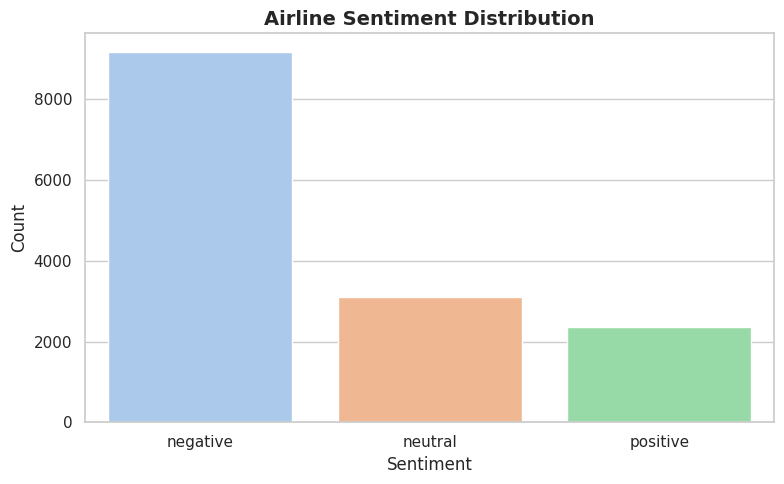

In [7]:
sentiment = df.airline_sentiment.value_counts().reset_index()

sns.set_theme(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(8, 5))  # Adjusting figure size
sns.barplot(
    data=sentiment, 
    x='airline_sentiment', 
    y='count', 
    palette='pastel'  # Soft and appealing color palette
)

# Adding title and labels
plt.title('Airline Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()

The plot indicates that the majority of the airline sentiments are negative, followed by neutral, and then positive.

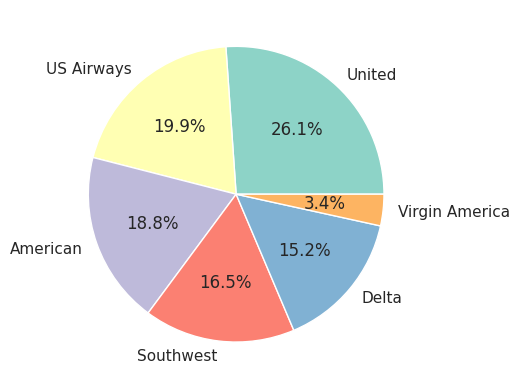

In [8]:
airlines = df.airline.value_counts().reset_index()

plt.pie(x=airlines['count'],labels=airlines['airline'],autopct='%1.1f%%', colors=sns.color_palette("Set3", len(airlines['count'])))
plt.show()

The pie chart illustrates the distribution of different airlines.

In [9]:

Review_Data = df[['text', 'airline_sentiment']]
Review_Data.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [10]:
Review_Data.shape


(14640, 2)

In [ ]:
from textblob import TextBlob
import re 

# removing special character 
def tweets_clean(comments):

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z  \t])|(\w+:\/\/\S+)", " ", comments).split())

for comments in Review_Data:
        analysis = TextBlob(tweets_clean(comments))

Review_Data['cleaned_text'] = Review_Data['text'].apply(tweets_clean)



/tmp/ipykernel_11032/690271347.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review_Data['cleaned_text'] = Review_Data['text'].apply(tweets_clean)


In [12]:
Review_Data.head(5)

,text,airline_sentiment,cleaned_text
0,@VirginAmerica What @dhepburn said.,neutral,What said
1,@VirginAmerica plus you've added commercials t...,positive,plus you ve added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,I didn t today Must mean I need to take anothe...
3,@VirginAmerica it's really aggressive to blast...,negative,it s really aggressive to blast obnoxious ente...
4,@VirginAmerica and it's a really big bad thing...,negative,and it s a really big bad thing about it


In [13]:
Review_Data=Review_Data.drop(Review_Data[Review_Data['airline_sentiment'] == 'neutral'].index )
Review_Data.drop('text',axis=1,inplace=True)


In [14]:
Review_Data

,airline_sentiment,cleaned_text
1,positive,plus you ve added commercials to the experienc...
3,negative,it s really aggressive to blast obnoxious ente...
4,negative,and it s a really big bad thing about it
5,negative,seriously would pay 30 a flight for seats that...
6,positive,yes nearly every time I fly VX this ear worm w...
...,...,...
14633,negative,my flight was Cancelled Flightled leaving tomo...
14634,negative,right on cue with the delays
14635,positive,thank you we got on a different flight to Chicago
14636,negative,leaving over 20 minutes Late Flight No warning...


In [15]:
Review_Data.shape

(11541, 2)

In [16]:
Review_Data.airline_sentiment.isnull().sum()

0

In [17]:
Data_new = set(Review_Data['airline_sentiment'])
Data_new

{'negative', 'positive'}

In [18]:
sentiment_label=Review_Data.airline_sentiment.factorize()
sentiment

,airline_sentiment,count
0,negative,9178
1,neutral,3099
2,positive,2363


In [19]:
tweet=Review_Data.cleaned_text.values
tweet

array(['plus you ve added commercials to the experience tacky',
       'it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
       'and it s a really big bad thing about it', ...,
       'thank you we got on a different flight to Chicago',
       'leaving over 20 minutes Late Flight No warnings or communication until we were 15 minutes Late Flight That s called shitty customer svc',
       'you have my money you change my flight and don t answer your phones Any other suggestions so I can make my commitment'],
      dtype=object)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2025-01-07 15:47:36.022995: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 15:47:36.091027: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 15:47:36.156080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736250456.228404   11032 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736250456.248826   11032 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 15:47:36.386443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [21]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

In [22]:
encoded_docs=tokenizer.texts_to_sequences(tweet)


In [43]:
# word embedding word to vec 
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence=pad_sequences(encoded_docs,maxlen=200)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Embedding

In [25]:
vocab_size=len(tokenizer.word_index)+1
embedding_vector_lenght=32

In [26]:
model=Sequential()

In [ ]:
# model building 
model.add(Embedding(vocab_size,embedding_vector_lenght,input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5)),
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

/home/mshameem/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-01-07 15:47:39.801354: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [28]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [29]:
history=model.fit(padded_sequence,sentiment_label[0],validation_split=0.2,epochs=5,batch_size=32)

Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.7808 - loss: 0.5251 - val_accuracy: 0.8900 - val_loss: 0.2621
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8698 - loss: 0.3046 - val_accuracy: 0.9142 - val_loss: 0.2130
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9059 - loss: 0.2443 - val_accuracy: 0.9272 - val_loss: 0.1831
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9250 - loss: 0.1962 - val_accuracy: 0.9337 - val_loss: 0.1786
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.9404 - loss: 0.1586 - val_accuracy: 0.9281 - val_loss: 0.1859


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 32)        │       366,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 32)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,148,195 (4.38 MB)

 Trainable params: 382,731 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 765,464 (2.92 MB)

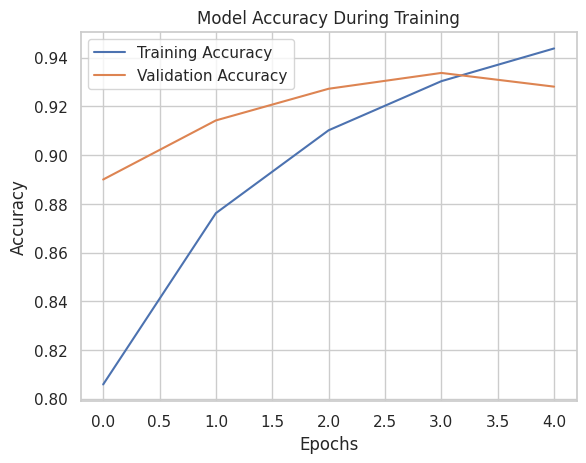

In [39]:
#for ploting  Accuracy during training 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy During Training')
plt.legend()
plt.show()

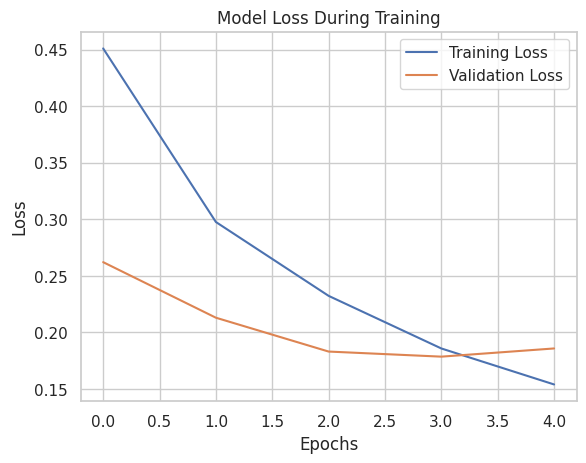

In [ ]:
# loss during training 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss During Training')
plt.legend()
plt.show()

In [31]:
# predict the sentiments 
def predict_sentiment(text):
    tw=tokenizer.texts_to_sequences([text])
    tw=pad_sequences(tw,maxlen=200)
    prediction=int(model.predict(tw).round().item())
    print("Predict Label:",sentiment_label[1][prediction])

In [37]:
test_sentences="I flew with Emirates last week and it was a wonderful experience! The cabin crew was friendly, and the food was delicious"
predict_sentiment(test_sentences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predict Label: positive


In [38]:
test_sentences="My flight with Etihad was delayed for over 3 hours. No apologies or explanations. Very disappointed"
predict_sentiment(test_sentences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predict Label: negative


In [36]:
test_sentences="The flight was delayed for hours, and no one informed me"
predict_sentiment(test_sentences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predict Label: negative
